In [12]:
# IMPORTING THE TENSORFLOW MODULE AND DOWNLOADING THE MNIST DATASET

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


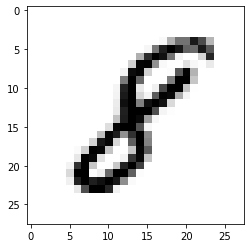

In [3]:
import matplotlib.pyplot as plt
#SELECTING A RANDOM IMAGE 
image_index = 6000 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# CREATING FLOATS TO AVOID INCOMPATIBABILITY ERROR BETWEEN FLOATS AND INTEGERS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB BY DIVIDING BY 255. THIS MAKES THE DATA TO FALL BETWEEN 1 AND 0
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing KERAS MODELS FOR MODEL CREATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model 
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
# CREATING AND COMPILING THE MODEL

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
# FITTING THE MODEL

In [ ]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0190 - accuracy: 0.9935
Epoch 2/10
 732/1875 [==========>...................] - ETA: 20s - loss: 0.0132 - accuracy: 0.9954

In [ ]:
# EVALUATING THE MODEL

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
#THE MODEL HAS GOOD ACCURACY

In [ ]:
# TESTING THE MODEL

In [ ]:
image_index = 300
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())